In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam
random_state = 11465209

In [2]:
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [3]:
#df_business = pd.read_json("yelp_academic_dataset_business.json", lines = True)
df_business = pd.read_csv("restaurant_features_all.csv")

## Loading Business Dataset

In [4]:
restaurant = df_business[df_business['categories'].str.contains('Restaurants', na = False)]
food1 = df_business[df_business['categories'].str.contains('Food', na = False)]
df_restaurant = pd.concat([restaurant,food1])
df_restaurant = df_restaurant.drop_duplicates(subset = ['business_id']).reset_index()
df_restaurant.drop('index', axis = 1, inplace = True)

In [5]:
df_restaurant

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,BusinessParking,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsDelivery,Total duration,Open Weekend,Median Age,Total Population,Sex Ratio,Percentage White
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,0,0,0,0,3 days 22:00:00,1.0,31.2,14689.0,93.1,54.088093
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,0,0,0,0,3 days 18:00:00,1.0,41.5,17835.0,102.6,92.195122
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,...,0,0,0,0,0 days 00:00:00,NaN,41.3,50463.0,93.9,89.194063
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,...,0,0,0,0,3 days 04:00:00,1.0,35.4,39151.0,86.6,30.921305
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,...,0,0,0,0,0 days 23:00:00,1.0,37.5,15860.0,113.5,69.672131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64611,0UqeZTDBdV0uY3wesbLvYQ,ampm,1701 Victorian Ave,Sparks,NV,89431,39.534947,-119.765698,4.0,5,...,0,0,0,0,0 days 00:00:00,0.0,36.3,39415.0,100.7,60.421159
64612,7xc84taj12pt-RtZhAfSkQ,Pimped Out Pickles,2801 N Kingshighway Blvd,Saint Louis,MO,63115,38.660185,-90.225247,5.0,8,...,0,0,0,0,1 days 06:00:00,1.0,42.4,16504.0,75.0,0.599855
64613,WXNag-tmudrFHFlfNLogWg,Whole Foods Market,4577 W Pine Blvd,St. Louis,MO,63108,38.641988,-90.261655,4.0,71,...,0,0,0,0,3 days 04:00:00,1.0,34.0,20442.0,103.1,54.872322
64614,AM7O0cwkxm6w_e0Q7-f9FQ,Starbucks,8817 S US-31,Indianapolis,IN,46227,39.638245,-86.128069,4.0,29,...,0,0,0,0,4 days 09:00:00,1.0,34.3,55806.0,94.0,72.137405


In [6]:
df1 = df_restaurant.copy()

In [7]:
df1.isna().sum()

business_id                       0
name                              0
address                         738
city                              0
state                             0
postal_code                      26
latitude                          0
longitude                         0
stars                             0
review_count                      0
is_open                           0
attributes                      876
categories                        0
hours                          9335
avg_rating                        0
review_id                         0
useful                            0
funny                             0
cool                              0
median_rating                     0
RestaurantsTakeOut                0
BusinessParking                   0
BusinessAcceptsCreditCards        0
RestaurantsPriceRange2            0
RestaurantsDelivery               0
Total duration                    0
Open Weekend                  10888
Median Age                  

In [8]:
states = df1.state.unique()

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df1['state'] = labelencoder.fit_transform(df1['state'])
df1

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,BusinessParking,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsDelivery,Total duration,Open Weekend,Median Age,Total Population,Sex Ratio,Percentage White
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,16,19107,39.955505,-75.155564,4.0,80,...,0,0,0,0,3 days 22:00:00,1.0,31.2,14689.0,93.1,54.088093
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,17,37015,36.269593,-87.058943,2.0,6,...,0,0,0,0,3 days 18:00:00,1.0,41.5,17835.0,102.6,92.195122
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,11,63123,38.565165,-90.321087,3.0,19,...,0,0,0,0,0 days 00:00:00,NaN,41.3,50463.0,93.9,89.194063
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,17,37207,36.208102,-86.768170,1.5,10,...,0,0,0,0,3 days 04:00:00,1.0,35.4,39151.0,86.6,30.921305
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,5,33602,27.955269,-82.456320,4.0,10,...,0,0,0,0,0 days 23:00:00,1.0,37.5,15860.0,113.5,69.672131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64611,0UqeZTDBdV0uY3wesbLvYQ,ampm,1701 Victorian Ave,Sparks,15,89431,39.534947,-119.765698,4.0,5,...,0,0,0,0,0 days 00:00:00,0.0,36.3,39415.0,100.7,60.421159
64612,7xc84taj12pt-RtZhAfSkQ,Pimped Out Pickles,2801 N Kingshighway Blvd,Saint Louis,11,63115,38.660185,-90.225247,5.0,8,...,0,0,0,0,1 days 06:00:00,1.0,42.4,16504.0,75.0,0.599855
64613,WXNag-tmudrFHFlfNLogWg,Whole Foods Market,4577 W Pine Blvd,St. Louis,11,63108,38.641988,-90.261655,4.0,71,...,0,0,0,0,3 days 04:00:00,1.0,34.0,20442.0,103.1,54.872322
64614,AM7O0cwkxm6w_e0Q7-f9FQ,Starbucks,8817 S US-31,Indianapolis,9,46227,39.638245,-86.128069,4.0,29,...,0,0,0,0,4 days 09:00:00,1.0,34.3,55806.0,94.0,72.137405


## Loading Restaurant reviews dataset containing Vader Results

In [9]:
df_rest = pd.read_csv("rest_reviews.csv")
df_rest

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,vader_result
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0.0,0.0,0.0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,1.0
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1.0,0.0,1.0,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,1.0
2,2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0.0,0.0,0.0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,1.0
3,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1.0,0.0,1.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,1.0
4,4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1.0,0.0,1.0,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6990277,6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1.0,2.0,1.0,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20,0.0
6990278,6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2.0,1.0,2.0,"This spot offers a great, affordable east week...",2021-03-31 16:55:10,1.0
6990279,6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1.0,0.0,0.0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30,1.0
6990280,6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1.0,0.0,0.0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27,1.0


### Adding column to business dataset showing percentage of positive reviews

In [10]:
bus_freq = df_rest.groupby(['business_id']).size() #bus_freq['---kPU91CF4Lq2-WlRu9Lw'] to get frequency of the business


In [11]:
revs = df_rest.groupby(['business_id', 'vader_result']).size() #revs['--0iUa4sNDFiZFrAdIWhZQ'][1.0] to find #revs of that business id with poistive reveiws
revs = revs.unstack(level = 0)
revs


business_id,---kPU91CF4Lq2-WlRu9Lw,--0iUa4sNDFiZFrAdIWhZQ,--30_8IhuyMHbSOcNWd6DQ,--7PUidqRWpRSpXebiyxTg,--7jw19RH9JKXgFohspgQw,--8IbOsAAxjKRoYsBFL-PA,--9osgUCSDUWUkoTLdvYhQ,--ARBQr1WMsTWiwOKOj-FQ,--FWWsIwxRwuw9vIMImcQg,--FcbSxK1AoEtEAxOgBaCw,...,zzg-Il9zxsaVXlCDrcG7hg,zziDpuuJw-Km1J4BaGpBKA,zzjCxn89a7RQo8keIOO_Ag,zzjFdJwXuxBOGe9JeY_EMw,zznJox6-nmXlGYNWgTDwQQ,zznZqH9CiAznbkV6fXyHWA,zztOG2cKm87I6Iw_tleZsQ,zzu6_r3DxBJuXcjnOYVdTw,zzw66H6hVjXQEt0Js3Mo4A,zzyx5x0Z7xXWWvWnZFuxlQ
vader_result,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,3.0,2.0,5.0,2.0,9.0,1.0,NaN,1.0,8.0,...,1.0,1.0,3.0,3.0,18.0,NaN,NaN,NaN,1.0,2.0
1.0,24.0,11.0,7.0,7.0,11.0,18.0,29.0,23.0,7.0,34.0,...,15.0,5.0,2.0,45.0,12.0,12.0,6.0,8.0,4.0,6.0


In [12]:
revs = revs.fillna(0)
revs

business_id,---kPU91CF4Lq2-WlRu9Lw,--0iUa4sNDFiZFrAdIWhZQ,--30_8IhuyMHbSOcNWd6DQ,--7PUidqRWpRSpXebiyxTg,--7jw19RH9JKXgFohspgQw,--8IbOsAAxjKRoYsBFL-PA,--9osgUCSDUWUkoTLdvYhQ,--ARBQr1WMsTWiwOKOj-FQ,--FWWsIwxRwuw9vIMImcQg,--FcbSxK1AoEtEAxOgBaCw,...,zzg-Il9zxsaVXlCDrcG7hg,zziDpuuJw-Km1J4BaGpBKA,zzjCxn89a7RQo8keIOO_Ag,zzjFdJwXuxBOGe9JeY_EMw,zznJox6-nmXlGYNWgTDwQQ,zznZqH9CiAznbkV6fXyHWA,zztOG2cKm87I6Iw_tleZsQ,zzu6_r3DxBJuXcjnOYVdTw,zzw66H6hVjXQEt0Js3Mo4A,zzyx5x0Z7xXWWvWnZFuxlQ
vader_result,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,3.0,2.0,5.0,2.0,9.0,1.0,0.0,1.0,8.0,...,1.0,1.0,3.0,3.0,18.0,0.0,0.0,0.0,1.0,2.0
1.0,24.0,11.0,7.0,7.0,11.0,18.0,29.0,23.0,7.0,34.0,...,15.0,5.0,2.0,45.0,12.0,12.0,6.0,8.0,4.0,6.0


In [13]:
#df1['business_id'][0]
#revs[df1['business_id'][1]][1.0]
revs[df1['business_id'][0]][0.0]

10.0

In [14]:
revs_ratio = []
for i in range(len(df1)):
    ratio = revs[df1['business_id'][i]][1.0]/(revs[df1['business_id'][i]][1.0] +revs[df1['business_id'][i]][0.0])

    revs_ratio.append(ratio)

In [15]:
df1['review_ratios'] = revs_ratio
df1


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsDelivery,Total duration,Open Weekend,Median Age,Total Population,Sex Ratio,Percentage White,review_ratios
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,16,19107,39.955505,-75.155564,4.0,80,...,0,0,0,3 days 22:00:00,1.0,31.2,14689.0,93.1,54.088093,0.885057
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,17,37015,36.269593,-87.058943,2.0,6,...,0,0,0,3 days 18:00:00,1.0,41.5,17835.0,102.6,92.195122,0.333333
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,11,63123,38.565165,-90.321087,3.0,19,...,0,0,0,0 days 00:00:00,NaN,41.3,50463.0,93.9,89.194063,0.842105
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,17,37207,36.208102,-86.768170,1.5,10,...,0,0,0,3 days 04:00:00,1.0,35.4,39151.0,86.6,30.921305,0.800000
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,5,33602,27.955269,-82.456320,4.0,10,...,0,0,0,0 days 23:00:00,1.0,37.5,15860.0,113.5,69.672131,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64611,0UqeZTDBdV0uY3wesbLvYQ,ampm,1701 Victorian Ave,Sparks,15,89431,39.534947,-119.765698,4.0,5,...,0,0,0,0 days 00:00:00,0.0,36.3,39415.0,100.7,60.421159,1.000000
64612,7xc84taj12pt-RtZhAfSkQ,Pimped Out Pickles,2801 N Kingshighway Blvd,Saint Louis,11,63115,38.660185,-90.225247,5.0,8,...,0,0,0,1 days 06:00:00,1.0,42.4,16504.0,75.0,0.599855,0.875000
64613,WXNag-tmudrFHFlfNLogWg,Whole Foods Market,4577 W Pine Blvd,St. Louis,11,63108,38.641988,-90.261655,4.0,71,...,0,0,0,3 days 04:00:00,1.0,34.0,20442.0,103.1,54.872322,0.934211
64614,AM7O0cwkxm6w_e0Q7-f9FQ,Starbucks,8817 S US-31,Indianapolis,9,46227,39.638245,-86.128069,4.0,29,...,0,0,0,4 days 09:00:00,1.0,34.3,55806.0,94.0,72.137405,0.833333


In [16]:
list(df1.columns)

['business_id',
 'name',
 'address',
 'city',
 'state',
 'postal_code',
 'latitude',
 'longitude',
 'stars',
 'review_count',
 'is_open',
 'attributes',
 'categories',
 'hours',
 'avg_rating',
 'review_id',
 'useful',
 'funny',
 'cool',
 'median_rating',
 'RestaurantsTakeOut',
 'BusinessParking',
 'BusinessAcceptsCreditCards',
 'RestaurantsPriceRange2',
 'RestaurantsDelivery',
 'Total duration',
 'Open Weekend',
 'Median Age',
 'Total Population',
 'Sex Ratio',
 'Percentage White',
 'review_ratios']

In [17]:
df1

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsDelivery,Total duration,Open Weekend,Median Age,Total Population,Sex Ratio,Percentage White,review_ratios
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,16,19107,39.955505,-75.155564,4.0,80,...,0,0,0,3 days 22:00:00,1.0,31.2,14689.0,93.1,54.088093,0.885057
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,17,37015,36.269593,-87.058943,2.0,6,...,0,0,0,3 days 18:00:00,1.0,41.5,17835.0,102.6,92.195122,0.333333
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,11,63123,38.565165,-90.321087,3.0,19,...,0,0,0,0 days 00:00:00,NaN,41.3,50463.0,93.9,89.194063,0.842105
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,17,37207,36.208102,-86.768170,1.5,10,...,0,0,0,3 days 04:00:00,1.0,35.4,39151.0,86.6,30.921305,0.800000
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,5,33602,27.955269,-82.456320,4.0,10,...,0,0,0,0 days 23:00:00,1.0,37.5,15860.0,113.5,69.672131,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64611,0UqeZTDBdV0uY3wesbLvYQ,ampm,1701 Victorian Ave,Sparks,15,89431,39.534947,-119.765698,4.0,5,...,0,0,0,0 days 00:00:00,0.0,36.3,39415.0,100.7,60.421159,1.000000
64612,7xc84taj12pt-RtZhAfSkQ,Pimped Out Pickles,2801 N Kingshighway Blvd,Saint Louis,11,63115,38.660185,-90.225247,5.0,8,...,0,0,0,1 days 06:00:00,1.0,42.4,16504.0,75.0,0.599855,0.875000
64613,WXNag-tmudrFHFlfNLogWg,Whole Foods Market,4577 W Pine Blvd,St. Louis,11,63108,38.641988,-90.261655,4.0,71,...,0,0,0,3 days 04:00:00,1.0,34.0,20442.0,103.1,54.872322,0.934211
64614,AM7O0cwkxm6w_e0Q7-f9FQ,Starbucks,8817 S US-31,Indianapolis,9,46227,39.638245,-86.128069,4.0,29,...,0,0,0,4 days 09:00:00,1.0,34.3,55806.0,94.0,72.137405,0.833333


## Handling NaN Values

In [18]:
total = df1.drop(['business_id','name','address','city','postal_code','attributes','categories','hours','review_id', 'Total duration'], axis = 1)
total

,state,latitude,longitude,stars,review_count,is_open,avg_rating,useful,funny,cool,...,BusinessParking,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsDelivery,Open Weekend,Median Age,Total Population,Sex Ratio,Percentage White,review_ratios
0,16,39.955505,-75.155564,4.0,80,1,4.057471,131,47,95,...,0,0,0,0,1.0,31.2,14689.0,93.1,54.088093,0.885057
1,17,36.269593,-87.058943,2.0,6,1,2.166667,0,0,0,...,0,0,0,0,1.0,41.5,17835.0,102.6,92.195122,0.333333
2,11,38.565165,-90.321087,3.0,19,0,2.947368,21,9,4,...,0,0,0,0,NaN,41.3,50463.0,93.9,89.194063,0.842105
3,17,36.208102,-86.768170,1.5,10,1,1.700000,2,2,0,...,0,0,0,0,1.0,35.4,39151.0,86.6,30.921305,0.800000
4,5,27.955269,-82.456320,4.0,10,1,4.090909,29,5,17,...,0,0,0,0,1.0,37.5,15860.0,113.5,69.672131,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64611,15,39.534947,-119.765698,4.0,5,1,4.200000,14,6,12,...,0,0,0,0,0.0,36.3,39415.0,100.7,60.421159,1.000000
64612,11,38.660185,-90.225247,5.0,8,1,4.750000,19,3,6,...,0,0,0,0,1.0,42.4,16504.0,75.0,0.599855,0.875000
64613,11,38.641988,-90.261655,4.0,71,1,4.026316,145,47,91,...,0,0,0,0,1.0,34.0,20442.0,103.1,54.872322,0.934211
64614,9,39.638245,-86.128069,4.0,29,1,3.866667,22,7,7,...,0,0,0,0,1.0,34.3,55806.0,94.0,72.137405,0.833333


In [19]:
total.isna().sum()

state                             0
latitude                          0
longitude                         0
stars                             0
review_count                      0
is_open                           0
avg_rating                        0
useful                            0
funny                             0
cool                              0
median_rating                     0
RestaurantsTakeOut                0
BusinessParking                   0
BusinessAcceptsCreditCards        0
RestaurantsPriceRange2            0
RestaurantsDelivery               0
Open Weekend                  10888
Median Age                     3456
Total Population               3370
Sex Ratio                      3453
Percentage White               3439
review_ratios                     0
dtype: int64

In [20]:
total = total.dropna()
total

,state,latitude,longitude,stars,review_count,is_open,avg_rating,useful,funny,cool,...,BusinessParking,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsDelivery,Open Weekend,Median Age,Total Population,Sex Ratio,Percentage White,review_ratios
0,16,39.955505,-75.155564,4.0,80,1,4.057471,131,47,95,...,0,0,0,0,1.0,31.2,14689.0,93.1,54.088093,0.885057
1,17,36.269593,-87.058943,2.0,6,1,2.166667,0,0,0,...,0,0,0,0,1.0,41.5,17835.0,102.6,92.195122,0.333333
3,17,36.208102,-86.768170,1.5,10,1,1.700000,2,2,0,...,0,0,0,0,1.0,35.4,39151.0,86.6,30.921305,0.800000
4,5,27.955269,-82.456320,4.0,10,1,4.090909,29,5,17,...,0,0,0,0,1.0,37.5,15860.0,113.5,69.672131,0.909091
5,9,39.637133,-86.127217,2.5,28,1,2.413793,19,4,14,...,0,0,0,0,1.0,34.3,55806.0,94.0,72.137405,0.586207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64611,15,39.534947,-119.765698,4.0,5,1,4.200000,14,6,12,...,0,0,0,0,0.0,36.3,39415.0,100.7,60.421159,1.000000
64612,11,38.660185,-90.225247,5.0,8,1,4.750000,19,3,6,...,0,0,0,0,1.0,42.4,16504.0,75.0,0.599855,0.875000
64613,11,38.641988,-90.261655,4.0,71,1,4.026316,145,47,91,...,0,0,0,0,1.0,34.0,20442.0,103.1,54.872322,0.934211
64614,9,39.638245,-86.128069,4.0,29,1,3.866667,22,7,7,...,0,0,0,0,1.0,34.3,55806.0,94.0,72.137405,0.833333


# Restaurant Closure

In [21]:
X = total.drop(['is_open','avg_rating','median_rating'], axis = 1)
Y = total['is_open']
X

,state,latitude,longitude,stars,review_count,useful,funny,cool,RestaurantsTakeOut,BusinessParking,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsDelivery,Open Weekend,Median Age,Total Population,Sex Ratio,Percentage White,review_ratios
0,16,39.955505,-75.155564,4.0,80,131,47,95,0,0,0,0,0,1.0,31.2,14689.0,93.1,54.088093,0.885057
1,17,36.269593,-87.058943,2.0,6,0,0,0,0,0,0,0,0,1.0,41.5,17835.0,102.6,92.195122,0.333333
3,17,36.208102,-86.768170,1.5,10,2,2,0,0,0,0,0,0,1.0,35.4,39151.0,86.6,30.921305,0.800000
4,5,27.955269,-82.456320,4.0,10,29,5,17,0,0,0,0,0,1.0,37.5,15860.0,113.5,69.672131,0.909091
5,9,39.637133,-86.127217,2.5,28,19,4,14,0,0,0,0,0,1.0,34.3,55806.0,94.0,72.137405,0.586207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64611,15,39.534947,-119.765698,4.0,5,14,6,12,0,0,0,0,0,0.0,36.3,39415.0,100.7,60.421159,1.000000
64612,11,38.660185,-90.225247,5.0,8,19,3,6,0,0,0,0,0,1.0,42.4,16504.0,75.0,0.599855,0.875000
64613,11,38.641988,-90.261655,4.0,71,145,47,91,0,0,0,0,0,1.0,34.0,20442.0,103.1,54.872322,0.934211
64614,9,39.638245,-86.128069,4.0,29,22,7,7,0,0,0,0,0,1.0,34.3,55806.0,94.0,72.137405,0.833333


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)
X_train

,state,latitude,longitude,stars,review_count,useful,funny,cool,RestaurantsTakeOut,BusinessParking,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsDelivery,Open Weekend,Median Age,Total Population,Sex Ratio,Percentage White,review_ratios
46109,1,32.236471,-110.893094,3.5,201,247,36,71,0,0,0,0,0,1.0,42.3,32494.0,89.7,77.605096,0.861244
46667,5,27.895205,-82.714028,3.0,127,56,16,15,0,0,0,0,0,1.0,36.0,18438.0,105.3,68.093069,0.778626
63501,17,36.105680,-86.818440,3.0,62,64,26,18,0,0,0,0,0,1.0,45.2,23044.0,80.7,85.992015,0.757576
52964,5,27.892442,-82.787762,3.0,13,9,2,5,0,0,0,0,0,1.0,48.5,15836.0,89.7,78.359434,0.769231
33198,17,36.148333,-86.798100,3.5,152,190,103,42,0,0,0,0,0,1.0,25.4,20672.0,84.6,74.032508,0.848101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5086,1,32.231356,-110.957778,3.0,36,40,18,12,0,0,0,0,0,1.0,23.0,48196.0,104.0,73.414806,0.673913
14331,5,27.937231,-82.483385,3.0,87,47,18,34,0,0,0,0,0,1.0,30.6,21789.0,92.1,85.139290,0.775281
58253,11,38.598216,-90.269303,4.5,63,129,58,65,0,0,0,0,0,1.0,35.9,43980.0,98.2,64.088222,0.955224
35016,5,27.995639,-82.509749,2.5,83,39,15,10,0,0,0,0,0,1.0,38.3,49652.0,109.9,66.806977,0.639535


In [23]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 1: NN

In [24]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(19,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer='sgd',
metrics=['accuracy'])
model.fit(X_train, y_train,epochs=5, batch_size=1, verbose=1)

Epoch 1/5
40851/40851 [==============================] - 51s 1ms/step - loss: 0.5500 - accuracy: 0.7320
Epoch 2/5
40851/40851 [==============================] - 50s 1ms/step - loss: 0.5401 - accuracy: 0.7380
Epoch 3/5
40851/40851 [==============================] - 51s 1ms/step - loss: 0.5383 - accuracy: 0.7392
Epoch 4/5
40851/40851 [==============================] - 51s 1ms/step - loss: 0.5365 - accuracy: 0.7400
Epoch 5/5
40851/40851 [==============================] - 51s 1ms/step - loss: 0.5358 - accuracy: 0.7408


In [25]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

10213/10213 [==============================] - 0s 26us/step
[0.5379128055522086, 0.7361206412315369]


## Logistic Regression with ROC-AUC curves

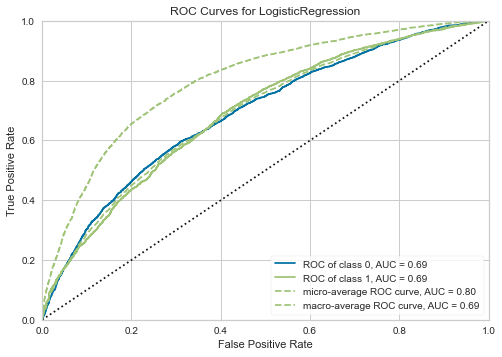

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [29]:
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model) 

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

## 2: NN

In [ ]:
# model = Sequential()
# model.add(Dense(8, activation='tanh', input_shape=(14,)))
# #model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='mean_squared_error',
# optimizer='sgd',
# metrics=['accuracy'])
# model.fit(X_train, y_train,epochs=5, batch_size=1, verbose=1)

In [ ]:
# y_pred = model.predict(X_test)
# score = model.evaluate(X_test, y_test,verbose=1)
# print(score)

## 3: NN

In [ ]:
# model = Sequential()
# model.add(Dense(7, activation='relu', input_shape=(5,)))
# #model.add(Dense(7, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='mean_squared_error',
# optimizer='sgd',
# metrics=['accuracy'])
# model.fit(X_train, y_train,epochs=5, batch_size=5, verbose=1)

In [ ]:
# y_pred = model.predict(X_test)
# score = model.evaluate(X_test, y_test,verbose=1)
# print(score)

## 4: LogReg

In [ ]:
# from sklearn.linear_model import LogisticRegression
# reg = LogisticRegression()
# reg.fit(X_train, y_train)

In [ ]:
# y_pred = reg.predict(X_test)

In [ ]:
# from sklearn import metrics
# print(metrics.accuracy_score(y_pred, y_test))

# Predicting restaurant ratings

In [21]:
total.columns

Index(['state', 'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'avg_rating', 'useful', 'funny', 'cool', 'median_rating',
       'RestaurantsTakeOut', 'BusinessParking', 'BusinessAcceptsCreditCards',
       'RestaurantsPriceRange2', 'RestaurantsDelivery', 'Open Weekend',
       'Median Age', 'Total Population', 'Sex Ratio', 'Percentage White',
       'review_ratios'],
      dtype='object')

In [21]:
X = total.drop(['avg_rating','median_rating', 'stars','useful', 'funny', 'cool','BusinessParking', 'BusinessAcceptsCreditCards',
       'RestaurantsPriceRange2','BusinessParking'], axis = 1)
Y = total['median_rating']

In [22]:
X

,state,latitude,longitude,review_count,is_open,RestaurantsTakeOut,RestaurantsDelivery,Open Weekend,Median Age,Total Population,Sex Ratio,Percentage White,review_ratios
0,16,39.955505,-75.155564,80,1,0,0,1.0,31.2,14689.0,93.1,54.088093,0.885057
1,17,36.269593,-87.058943,6,1,0,0,1.0,41.5,17835.0,102.6,92.195122,0.333333
3,17,36.208102,-86.768170,10,1,0,0,1.0,35.4,39151.0,86.6,30.921305,0.800000
4,5,27.955269,-82.456320,10,1,0,0,1.0,37.5,15860.0,113.5,69.672131,0.909091
5,9,39.637133,-86.127217,28,1,0,0,1.0,34.3,55806.0,94.0,72.137405,0.586207
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64611,15,39.534947,-119.765698,5,1,0,0,0.0,36.3,39415.0,100.7,60.421159,1.000000
64612,11,38.660185,-90.225247,8,1,0,0,1.0,42.4,16504.0,75.0,0.599855,0.875000
64613,11,38.641988,-90.261655,71,1,0,0,1.0,34.0,20442.0,103.1,54.872322,0.934211
64614,9,39.638245,-86.128069,29,1,0,0,1.0,34.3,55806.0,94.0,72.137405,0.833333


In [23]:
X.columns

Index(['state', 'latitude', 'longitude', 'review_count', 'is_open',
       'RestaurantsTakeOut', 'RestaurantsDelivery', 'Open Weekend',
       'Median Age', 'Total Population', 'Sex Ratio', 'Percentage White',
       'review_ratios'],
      dtype='object')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)
X_train

,state,latitude,longitude,review_count,is_open,RestaurantsTakeOut,RestaurantsDelivery,Open Weekend,Median Age,Total Population,Sex Ratio,Percentage White,review_ratios
46109,1,32.236471,-110.893094,201,0,0,0,1.0,42.3,32494.0,89.7,77.605096,0.861244
46667,5,27.895205,-82.714028,127,1,0,0,1.0,36.0,18438.0,105.3,68.093069,0.778626
63501,17,36.105680,-86.818440,62,1,0,0,1.0,45.2,23044.0,80.7,85.992015,0.757576
52964,5,27.892442,-82.787762,13,0,0,0,1.0,48.5,15836.0,89.7,78.359434,0.769231
33198,17,36.148333,-86.798100,152,1,0,0,1.0,25.4,20672.0,84.6,74.032508,0.848101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5086,1,32.231356,-110.957778,36,0,0,0,1.0,23.0,48196.0,104.0,73.414806,0.673913
14331,5,27.937231,-82.483385,87,1,0,0,1.0,30.6,21789.0,92.1,85.139290,0.775281
58253,11,38.598216,-90.269303,63,1,0,0,1.0,35.9,43980.0,98.2,64.088222,0.955224
35016,5,27.995639,-82.509749,83,1,0,0,1.0,38.3,49652.0,109.9,66.806977,0.639535


In [25]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
model = Sequential()
model.add(Dense(9, activation='relu', input_shape=(13,)))
model.add(Dense(5, activation='relu', input_shape=(13,)))
model.add(Dense(1, activation='linear'))
#model.add(Dense(1))
model.compile(loss='mean_squared_error',
optimizer='sgd',
metrics=['accuracy'])
model.fit(X_train, y_train,epochs=10, batch_size=1, verbose=1)

Epoch 1/10
40851/40851 [==============================] - 43s 1ms/step - loss: 0.5324 - accuracy: 0.5223
Epoch 2/10
40851/40851 [==============================] - 43s 1ms/step - loss: 0.5042 - accuracy: 0.5316
Epoch 3/10
40851/40851 [==============================] - 44s 1ms/step - loss: 0.5008 - accuracy: 0.5386
Epoch 4/10
40851/40851 [==============================] - 48s 1ms/step - loss: 0.5007 - accuracy: 0.5385
Epoch 5/10
40851/40851 [==============================] - 43s 1ms/step - loss: 0.4977 - accuracy: 0.5408
Epoch 6/10
40851/40851 [==============================] - 42s 1ms/step - loss: 0.4998 - accuracy: 0.5369
Epoch 7/10
40851/40851 [==============================] - 43s 1ms/step - loss: 0.4968 - accuracy: 0.5403
Epoch 8/10
40851/40851 [==============================] - 45s 1ms/step - loss: 0.4953 - accuracy: 0.5434
Epoch 9/10
40851/40851 [==============================] - 42s 1ms/step - loss: 0.4987 - accuracy: 0.5380
Epoch 10/10
40851/40851 [==============================

In [27]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

10213/10213 [==============================] - 0s 26us/step
[0.4753204596144182, 0.5764222145080566]


### Saving total dataset as a CSV

In [38]:
total

,state,latitude,longitude,stars,review_count,is_open,avg_rating,useful,funny,cool,...,BusinessParking,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsDelivery,Open Weekend,Median Age,Total Population,Sex Ratio,Percentage White,review_ratios
0,16,39.955505,-75.155564,4.0,80,1,4.057471,131,47,95,...,0,0,0,0,1.0,31.2,14689.0,93.1,54.088093,0.885057
1,17,36.269593,-87.058943,2.0,6,1,2.166667,0,0,0,...,0,0,0,0,1.0,41.5,17835.0,102.6,92.195122,0.333333
3,17,36.208102,-86.768170,1.5,10,1,1.700000,2,2,0,...,0,0,0,0,1.0,35.4,39151.0,86.6,30.921305,0.800000
4,5,27.955269,-82.456320,4.0,10,1,4.090909,29,5,17,...,0,0,0,0,1.0,37.5,15860.0,113.5,69.672131,0.909091
5,9,39.637133,-86.127217,2.5,28,1,2.413793,19,4,14,...,0,0,0,0,1.0,34.3,55806.0,94.0,72.137405,0.586207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64611,15,39.534947,-119.765698,4.0,5,1,4.200000,14,6,12,...,0,0,0,0,0.0,36.3,39415.0,100.7,60.421159,1.000000
64612,11,38.660185,-90.225247,5.0,8,1,4.750000,19,3,6,...,0,0,0,0,1.0,42.4,16504.0,75.0,0.599855,0.875000
64613,11,38.641988,-90.261655,4.0,71,1,4.026316,145,47,91,...,0,0,0,0,1.0,34.0,20442.0,103.1,54.872322,0.934211
64614,9,39.638245,-86.128069,4.0,29,1,3.866667,22,7,7,...,0,0,0,0,1.0,34.3,55806.0,94.0,72.137405,0.833333


In [43]:
total.to_csv("total", index = False)

In [44]:
test = pd.read_csv("total")
test

,state,latitude,longitude,stars,review_count,is_open,avg_rating,useful,funny,cool,...,BusinessParking,BusinessAcceptsCreditCards,RestaurantsPriceRange2,RestaurantsDelivery,Open Weekend,Median Age,Total Population,Sex Ratio,Percentage White,review_ratios
0,16,39.955505,-75.155564,4.0,80,1,4.057471,131,47,95,...,0,0,0,0,1.0,31.2,14689.0,93.1,54.088093,0.885057
1,17,36.269593,-87.058943,2.0,6,1,2.166667,0,0,0,...,0,0,0,0,1.0,41.5,17835.0,102.6,92.195122,0.333333
2,17,36.208102,-86.768170,1.5,10,1,1.700000,2,2,0,...,0,0,0,0,1.0,35.4,39151.0,86.6,30.921305,0.800000
3,5,27.955269,-82.456320,4.0,10,1,4.090909,29,5,17,...,0,0,0,0,1.0,37.5,15860.0,113.5,69.672131,0.909091
4,9,39.637133,-86.127217,2.5,28,1,2.413793,19,4,14,...,0,0,0,0,1.0,34.3,55806.0,94.0,72.137405,0.586207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51059,15,39.534947,-119.765698,4.0,5,1,4.200000,14,6,12,...,0,0,0,0,0.0,36.3,39415.0,100.7,60.421159,1.000000
51060,11,38.660185,-90.225247,5.0,8,1,4.750000,19,3,6,...,0,0,0,0,1.0,42.4,16504.0,75.0,0.599855,0.875000
51061,11,38.641988,-90.261655,4.0,71,1,4.026316,145,47,91,...,0,0,0,0,1.0,34.0,20442.0,103.1,54.872322,0.934211
51062,9,39.638245,-86.128069,4.0,29,1,3.866667,22,7,7,...,0,0,0,0,1.0,34.3,55806.0,94.0,72.137405,0.833333
